In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
energy_efficiency = fetch_ucirepo(id=242)

# data (as pandas dataframes)
X = energy_efficiency.data.features
y = energy_efficiency.data.targets

# metadata
print(energy_efficiency.metadata)

# variable information
print(energy_efficiency.variables)

{'uci_id': 242, 'name': 'Energy Efficiency', 'repository_url': 'https://archive.ics.uci.edu/dataset/242/energy+efficiency', 'data_url': 'https://archive.ics.uci.edu/static/public/242/data.csv', 'abstract': 'This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 768, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y1', 'Y2'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C51307', 'creators': ['Athanasios Tsanas', 'Angeliki Xifara'], 'intro_paper': {'ID': 379, 'type': 'NATIVE', 'title': 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine 

In [3]:
print(f"The features are \n\n{X}, \n\n and the objects to predict\n\n {y}\n we, have to predict y['Y1'], as it corresponds to 'Heating Load'")

The features are 

       X1     X2     X3      X4   X5  X6   X7  X8
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0
..    ...    ...    ...     ...  ...  ..  ...  ..
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5

[768 rows x 8 columns], 

 and the objects to predict

         Y1     Y2
0    15.55  21.33
1    15.55  21.33
2    15.55  21.33
3    15.55  21.33
4    20.84  28.28
..     ...    ...
763  17.88  21.40
764  16.54  16.88
765  16.44  17.11
766  16.48  16.61
767  16.64  16.03

[768 rows x 2 columns]
 we, have to predict y['Y1'], as it corresponds to 'Heating Load'



1. check for null, 
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
dtype: int64

Y1    0
Y2    0
dtype: int64 

There are no missing values to account for


----------



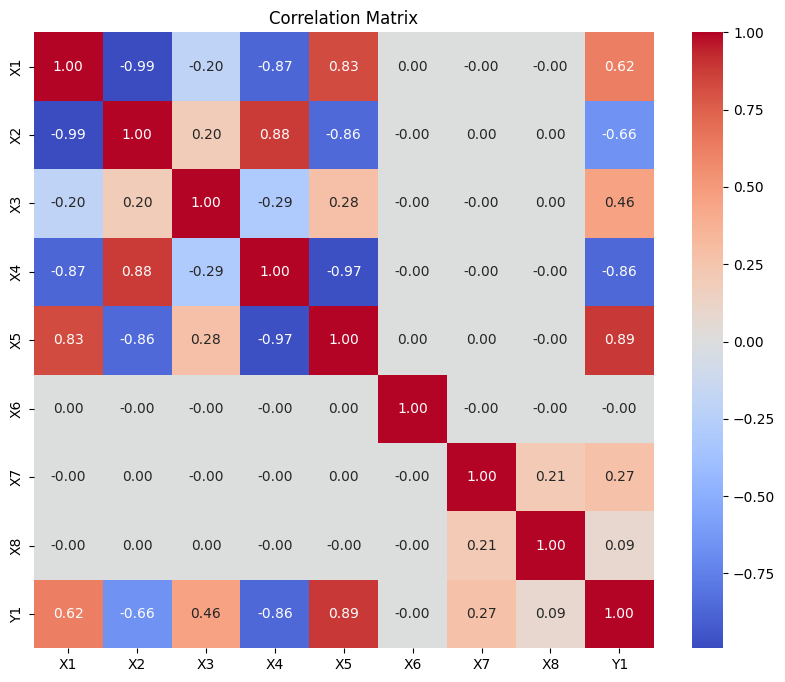

In [4]:
print(f"""
1. check for null, \n{X.isnull().sum()}\n\n{y.isnull().sum()} \n
There are no missing values to account for
""")
print("\n----------\n")

# correlation plot
import seaborn as sns
import matplotlib.pyplot as plt

X_with_y = X.copy()
X_with_y['Y1'] = y['Y1']

correlation_matrix = X_with_y.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix") # It uses pearson correlation matrix by default(as the data points are linear this works well).
plt.show()

X1 and X4 are not required as they have negative values

<ipython-input-5-77a1f9f6d02b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['X1', 'X4'], inplace=True)


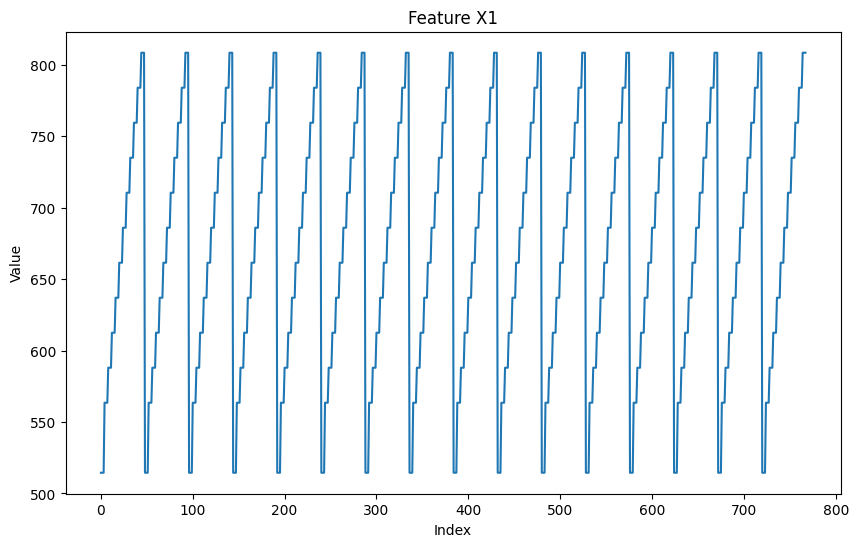

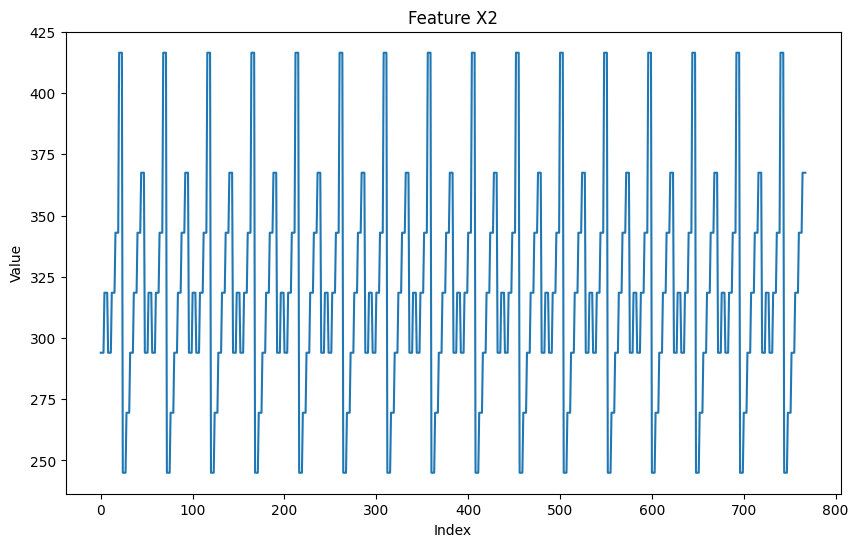

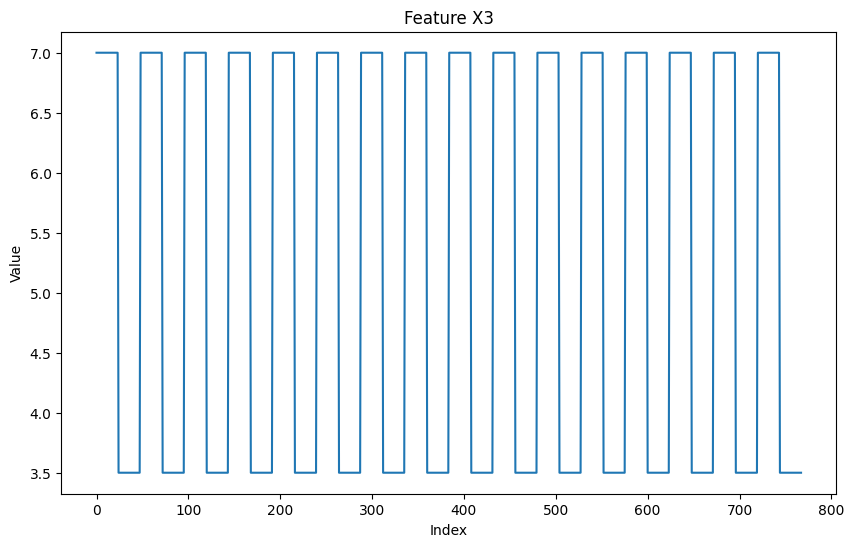

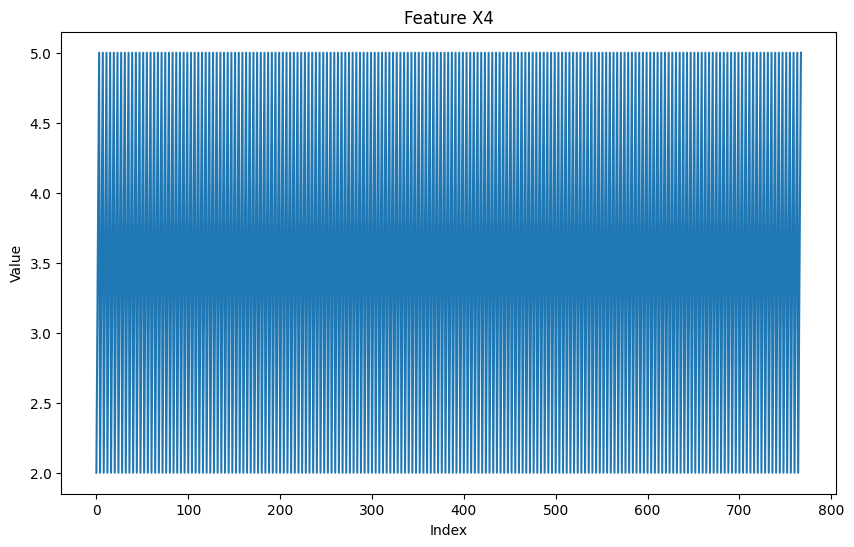

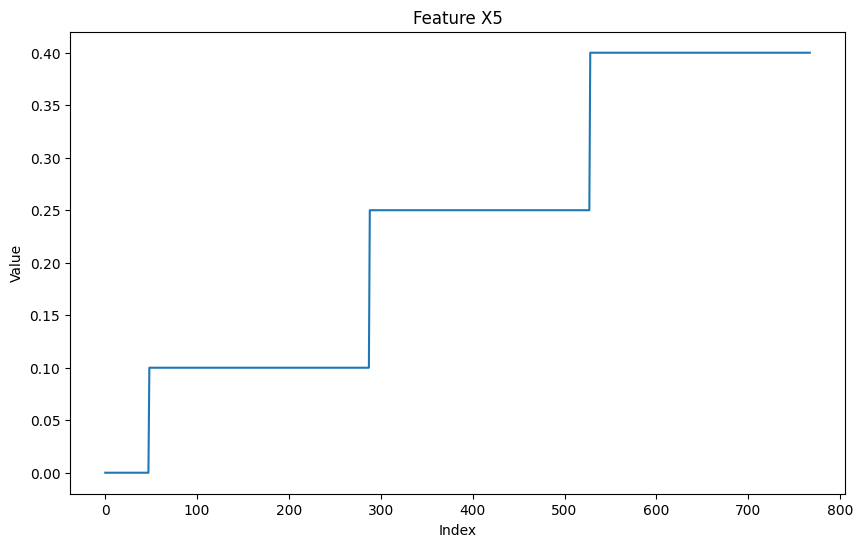

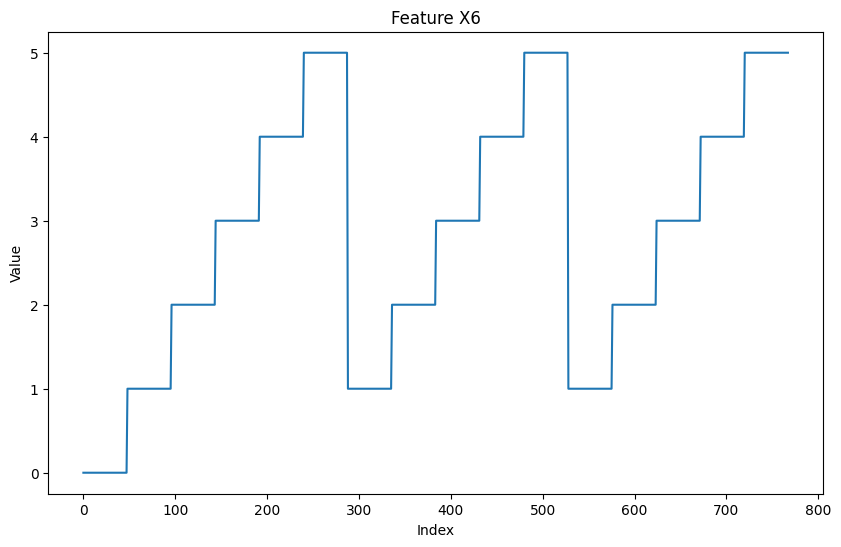

In [5]:
X.drop(columns=['X1', 'X4'], inplace=True)

num_features = X.shape[1]

for i in range(num_features):
  if i != 1 or i!=4:
    plt.figure(figsize=(10, 6))
    plt.plot(X.iloc[:, i])
    plt.title(f'Feature X{i+1}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.show()


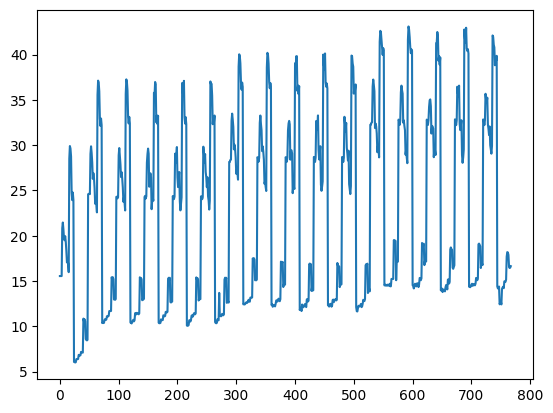

In [17]:
plt.plot(y['Y1'])
plt.show()

From the graph we can see there are no outliers so, no need to do other calculations

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y["Y1"], test_size=0.2, random_state=42)
print(f"Training set size: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing set size: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training set size: X_train = (614, 6), y_train = (614,)
Testing set size: X_test = (154, 6), y_test = (154,)


In [7]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

class LinearRegressionScratch:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        self.weights = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.weights)

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y, y_pred)
        print(f"R2 = {r2:.4f}, MSE = {mse:.4f}, RMSE = {rmse:.4f}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegressionScratch()
model.fit(X_train_scaled, y_train)

model.evaluate(X_train_scaled, y_train)
model.evaluate(X_test_scaled, y_test)

R2 = 0.9131, MSE = 8.7751, RMSE = 2.9623
R2 = 0.9063, MSE = 9.7635, RMSE = 3.1247


In [8]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [9]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
print(lr.intercept_)
print(lr.coef_)

22.1550325732899
[ 1.17028968  1.69535019  9.47872752 -0.02889254  2.71973614  0.33566459]


In [10]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)
print(lasso_reg.intercept_)
print(lasso_reg.coef_)

22.1550325732899
[ 0.          2.1612847   8.24667747 -0.          2.63576548  0.24723998]


In [11]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)
print(ridge_reg.intercept_)
print(ridge_reg.coef_)

22.1550325732899
[ 0.90167922  1.82223457  9.19860485 -0.03119031  2.71557782  0.33500188]


In [12]:
y_pred_manual = model.predict(X_test_scaled)
y_pred_sklearn = lr.predict(X_test_scaled)
y_pred_ridge = ridge_reg.predict(X_test_scaled)
y_pred_lasso = lasso_reg.predict(X_test_scaled)

In [13]:
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return r2, mse, rmse

In [14]:
r2_manual, mse_manual, rmse_manual = calculate_metrics(y_test, y_pred_manual)
r2_sklearn, mse_sklearn, rmse_sklearn  = calculate_metrics(y_test, y_pred_sklearn)
r2_ridge, mse_ridge, rmse_ridge  = calculate_metrics(y_test, y_pred_ridge)
r2_lasso, mse_lasso, rmse_lasso  = calculate_metrics(y_test, y_pred_lasso)

print(f"Manual Linear Regression: R²={r2_manual:.4f}, MSE={mse_manual:.4f}, RMSE={rmse_manual:.4f} ")
print(f"Sklearn Linear Regression: R²={r2_sklearn:.4f}, MSE={mse_sklearn:.4f}, RMSE={rmse_sklearn:.4f}")
print(f"Ridge Regression: R²={r2_ridge:.4f}, MSE={mse_ridge:.4f}, RMSE={rmse_ridge:.4f} ")
print(f"Lasso Regression: R²={r2_lasso:.4f}, MSE={mse_lasso:.4f}, RMSE={rmse_lasso:.4f} ")

Manual Linear Regression: R²=0.9063, MSE=9.7635, RMSE=3.1247 
Sklearn Linear Regression: R²=0.9063, MSE=9.7635, RMSE=3.1247
Ridge Regression: R²=0.9060, MSE=9.7950, RMSE=3.1297 
Lasso Regression: R²=0.9046, MSE=9.9392, RMSE=3.1526 


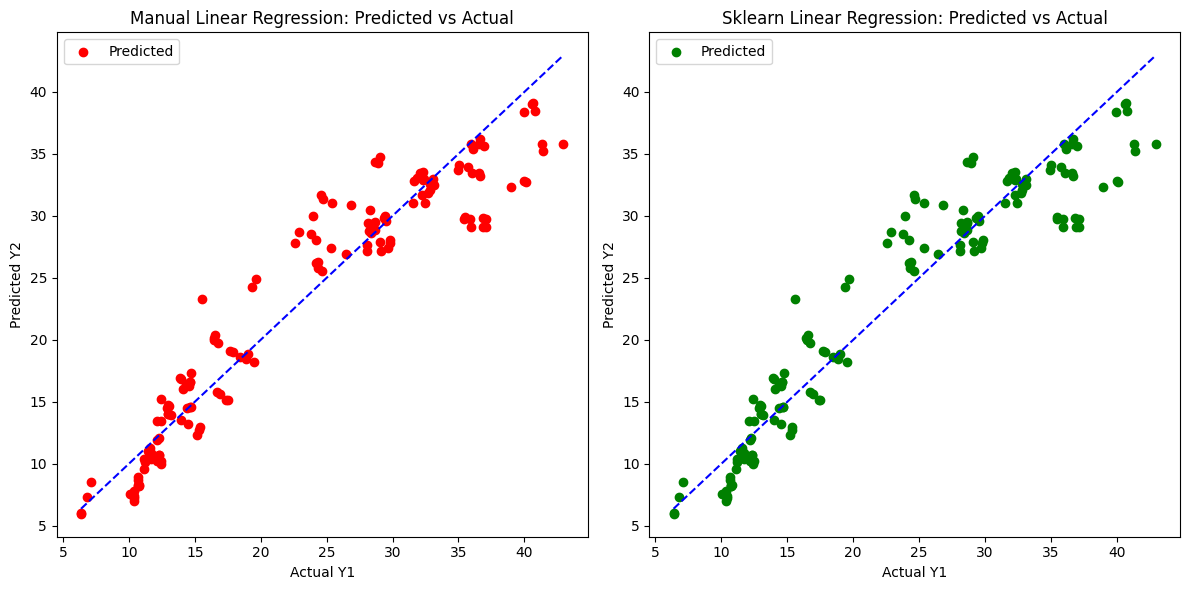

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_manual, color='red', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--')
plt.xlabel("Actual Y1")
plt.ylabel("Predicted Y2")
plt.title("Manual Linear Regression: Predicted vs Actual")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_sklearn, color='green', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--')
plt.xlabel("Actual Y1")
plt.ylabel("Predicted Y2")
plt.title("Sklearn Linear Regression: Predicted vs Actual")
plt.legend()

plt.tight_layout()
plt.show()

As, X1, X5 and X3, has high correlation value,

1.   Relative Compactness(Higher relative compactness reduces heat loss by minimizing external surface area)
2.   Overall Height(As X5 increases, the stack effect and heat stratification cause greater heating demands)
3.   Wall Area(Larger wall areas increase heat exchange with the external environment),

These will most significantly affect the heating load.

Also, from the graph we can see that, X5 is very different from the other graph, and also it affects the results the maximum, so in order to account for that, we can use a mapper to map all $X_i[:A]$ in the same space with some linear function.


